In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


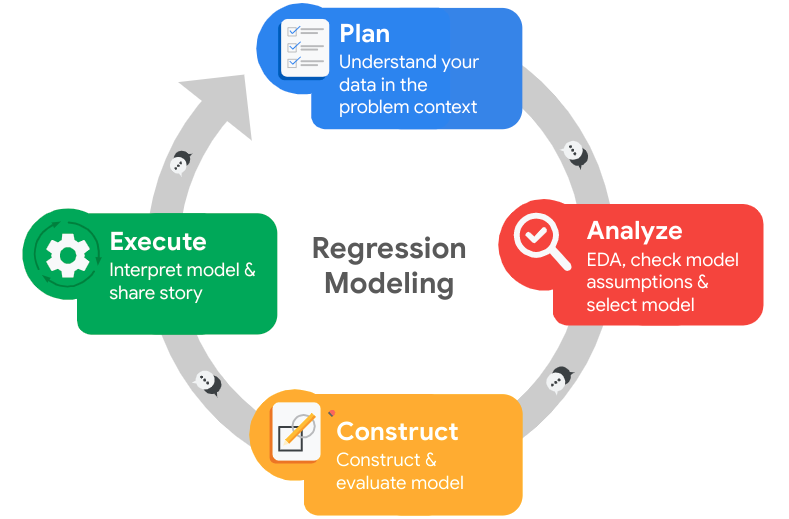

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




#### 1. **Who are your stakeholders for this project?**

The primary stakeholders are:

* **HR Department** at Salifort Motors – responsible for employee satisfaction and retention strategies.
* **Senior Management** – interested in reducing turnover costs and improving workforce stability.
* **Employees** – indirectly affected by any policy changes based on this analysis.

---

#### 2. **What are you trying to solve or accomplish?**

The objective is to:

* **Identify key factors** that influence whether an employee leaves the company.
* **Build a predictive model** that estimates the likelihood of attrition.
* **Provide actionable insights** to help the HR team design effective employee retention initiatives.

Ultimately, we aim to **reduce employee turnover** by using data-driven recommendations that improve satisfaction and engagement.

---

#### 3. **What are your initial observations when you explore the data?**

* The dataset contains useful features such as **satisfaction level, number of projects, time spent at the company, average monthly hours**, and more.
* Some features had **inconsistent formatting** (e.g., column names), and **outliers** were present in `time_spend_company`.
* There were **duplicates and a few misspelled column names**, which were addressed during data cleaning.
* The data appears to be **fairly balanced**, but further analysis is needed to confirm this for the target variable (`left`).

---

#### 4. **What resources do you find yourself using as you complete this stage?**

I referred to the following resources:

* 📘 [pandas documentation](https://pandas.pydata.org/docs/) – for data cleaning, transformation, and exploratory analysis.
* 📘 [matplotlib](https://matplotlib.org/stable/contents.html) and [seaborn](https://seaborn.pydata.org/) – for data visualization and outlier detection.
* 📘 [Google Advanced Data Analytics course materials](https://www.coursera.org/professional-certificates/google-advanced-data-analytics) – to align with certificate best practices.
* 📘 [Stack Overflow](https://stackoverflow.com/) – for resolving Python errors and refining techniques.
* 📘 [PEP 8](https://peps.python.org/pep-0008/) – for Python naming conventions, particularly when standardizing column names.

---

#### 5. **Do you have any ethical considerations in this stage?**

Yes, ethical considerations are critical:

* **Privacy**: Ensuring the data is anonymized and doesn't expose personal employee information.
* **Bias in analysis**: Avoiding conclusions that might lead to discrimination (e.g., using irrelevant or sensitive variables like department or salary unfairly).
* **Impact of predictions**: Recommendations should improve employee wellbeing, not just reduce turnover costs. Misinterpretation could lead to unfair treatment of employees predicted to leave.



## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [3]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.columns = (
    df0.columns
    .str.strip()                      # remove leading/trailing whitespace
    .str.lower()                      # lowercase all names
    .str.replace(' ', '_')            # replace spaces with underscores
    .str.replace('-', '_')            # replace hyphens with underscores
    .str.replace(r'[^\w]', '', regex=True)  # remove non-word characters
)

# Manual corrections if needed
df0.rename(columns={
    'average_montly_hours': 'average_monthly_hours',
    'promotion_last_5years': 'promotion_last_5_years',  
}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()


satisfaction_level        0
last_evaluation           0
number_project            0
average_monthly_hours     0
time_spend_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

np.int64(3008)

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated(keep=False)].head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

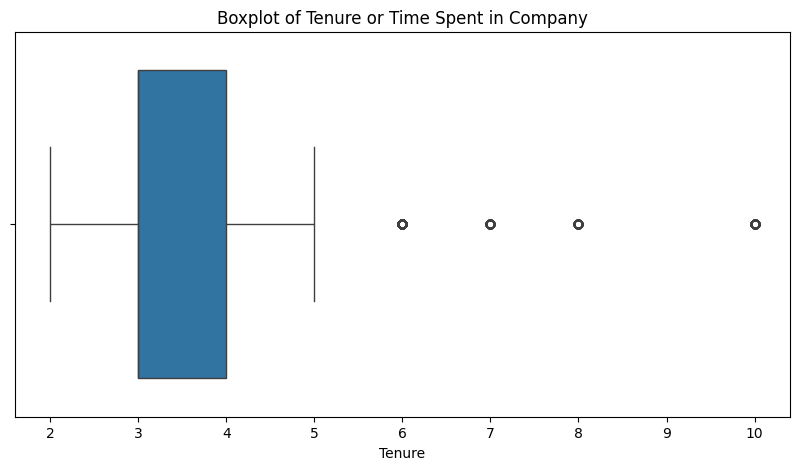

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns   
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['time_spend_company'])
plt.title('Boxplot of Tenure or Time Spent in Company')
plt.xlabel('Tenure')
plt.show()  



In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
# Step 1: Define the column you want to check for outliers
col = 'time_spend_company'

# Step 2: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)

# Step 3: Calculate the IQR
IQR = Q3 - Q1

# Step 4: Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5: Count the number of rows where the column value is an outlier
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
num_outliers = outliers.shape[0]

print(f'Number of outliers in {col}:', num_outliers)




Number of outliers in time_spend_company: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?





1. What did you observe about the relationships between variables?
I observed that several variables have clear relationships with employee attrition (left). For example, lower satisfaction levels, high or very low working hours, and lack of promotion are associated with a higher likelihood of leaving. Interestingly, last evaluation scores showed a wide range among those who left, suggesting that both underperformers and high performers may be at risk. Tenure also played a role — most employees who left had spent 3 to 5 years at the company.

2. What do you observe about the distributions in the data?
The data contains a mix of continuous, binary, and categorical variables. Many of the binary variables (like work_accident and promotion_last_5_years) are heavily skewed toward 0. The continuous variables such as satisfaction_level and average_monthly_hours are not normally distributed — they show clusters or outliers. For instance, satisfaction levels for those who left tend to fall below 0.5. Histograms helped visualize these distributions clearly.

3. What transformations did you make with your data? Why did you choose to make those decisions?
I standardized the column names using snake_case for consistency and ease of coding. I also corrected misspellings (e.g., average_montly_hours to average_monthly_hours). I removed duplicate records to avoid data distortion, and I created several visual subsets (e.g., df_eval) to analyze specific relationships. These decisions were made to clean the dataset and make it easier to explore and visualize key trends.

4. What are some purposes of EDA before constructing a predictive model?
Exploratory Data Analysis (EDA) helps identify meaningful patterns, detect outliers, and understand variable distributions and relationships. It also helps validate assumptions and decide which features may be important for modeling. In this case, EDA revealed which variables might be strong predictors of employee attrition and helped ensure the data was clean and usable.

5. What resources do you find yourself using as you complete this stage?
I used a combination of course materials, documentation, and online resources:

Seaborn documentation
Pandas documentation
Stack Overflow for troubleshooting syntax and visualization logic
Google search for clarification on certain graph types and best practices in EDA
ChatGPT to check my code and clean my conclusions 

6. Do you have any ethical considerations in this stage?
Yes. It's important to remember that each data point represents a real employee. Variables like salary and department should not be used to unfairly target or stereotype individuals. Also, since we're analyzing attrition, it's important that findings are used to improve working conditions and retention strategies — not to penalize or label certain groups. Transparency and fairness are essential when building predictive models based on human data.here people leave the most are sales, technical and support.  

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
# Step 1: Count the number of people who left (1) and stayed (0)
left_count = df['left'].value_counts()  


# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
# Step 2: Calculate the percentage of people who left (1) and stayed (0)
left_percentage = (left_count[1] / len(df)) * 100
stayed_percentage = (left_count[0] / len(df)) * 100 
# Step 3: Print the results 
print(f"Percentage of people who left: {left_percentage:.2f}%")
print(f"Percentage of people who stayed: {stayed_percentage:.2f}%")



Percentage of people who left: 16.60%
Percentage of people who stayed: 83.40%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

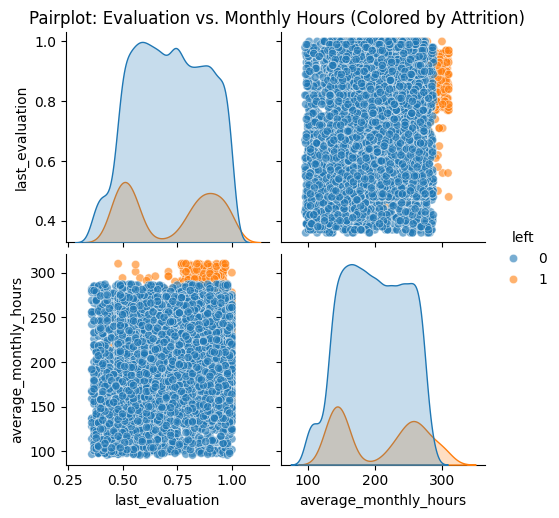

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###

import matplotlib.pyplot as plt
# Pairplot with hue to show who left (1) and who stayed (0)
df_eval = df[['last_evaluation', 'average_monthly_hours', 'left']]

sns.pairplot(df_eval, hue='left', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot: Evaluation vs. Monthly Hours (Colored by Attrition)', y=1.02)
plt.show()


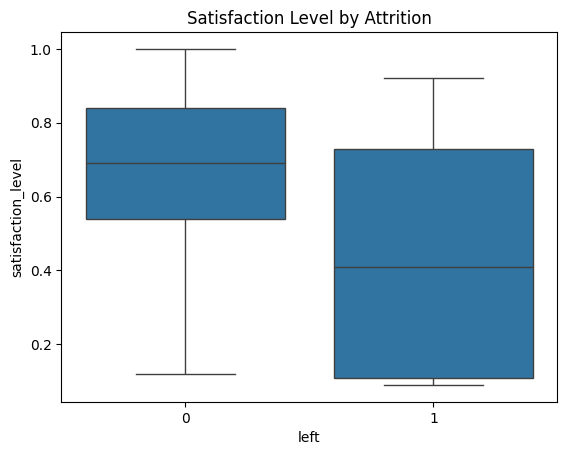

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level by Attrition')
plt.show()

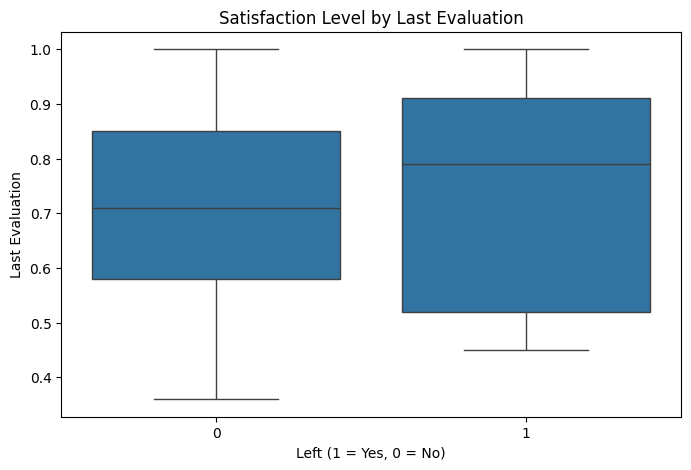

In [18]:

# Create a plot as needed
### YOUR CODE HERE ###

# --- Boxplot ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='left', y='last_evaluation', data=df_eval)
plt.title('Satisfaction Level by Last Evaluation')
plt.xlabel('Left (1 = Yes, 0 = No)')
plt.ylabel('Last Evaluation')
plt.show()

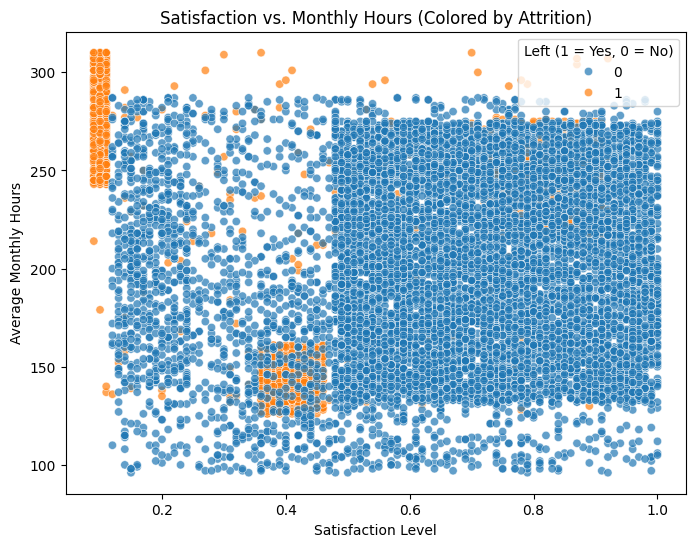

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='satisfaction_level', y='average_monthly_hours', hue='left', alpha=0.7)
plt.title('Satisfaction vs. Monthly Hours (Colored by Attrition)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.legend(title='Left (1 = Yes, 0 = No)')
plt.show()

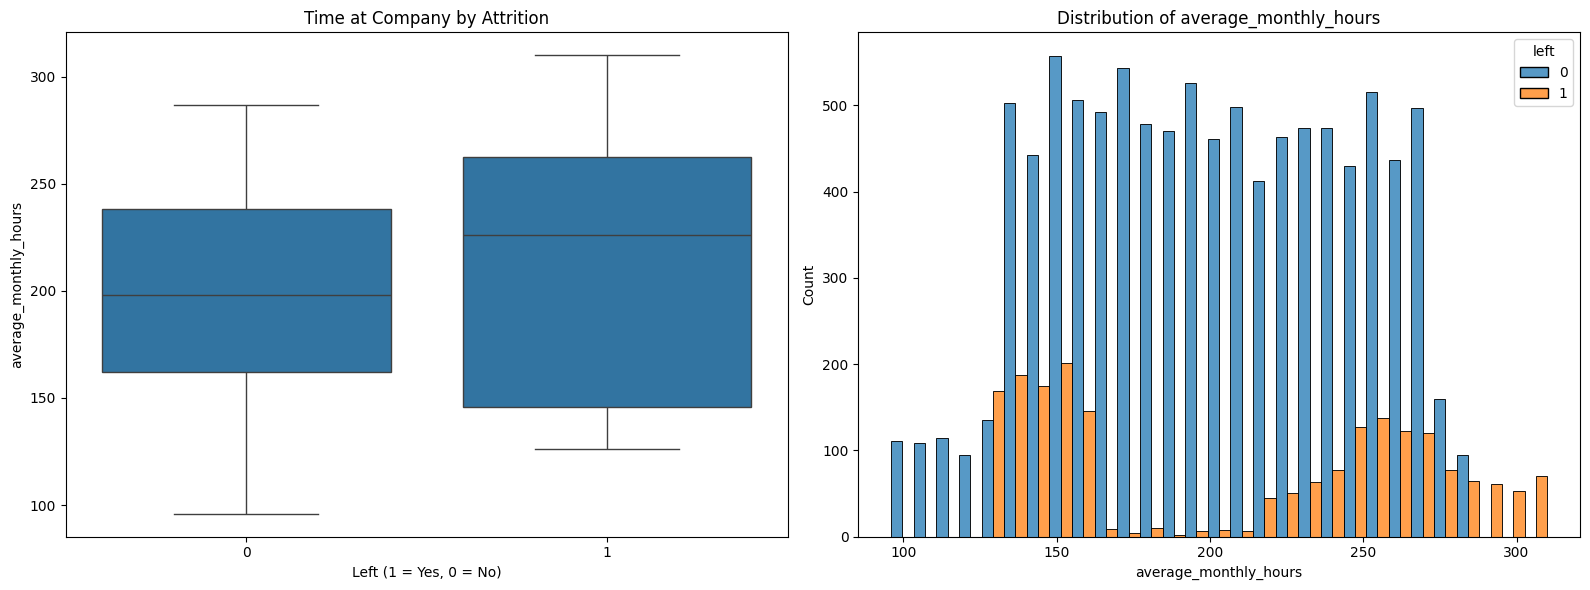

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
# Subset data
df_eval = df[['left', 'average_monthly_hours']]

# Set up subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# --- Boxplot ---
sns.boxplot(x='left', y='average_monthly_hours', data=df_eval, ax=ax[0])
ax[0].set_title('Time at Company by Attrition')
ax[0].set_xlabel('Left (1 = Yes, 0 = No)')
ax[0].set_ylabel('average_monthly_hours')

# --- Histogram ---
sns.histplot(data=df, x='average_monthly_hours', hue='left', multiple='dodge', ax=ax[1])
ax[1].set_title('Distribution of average_monthly_hours')
ax[1].set_xlabel('average_monthly_hours')
ax[1].set_ylabel('Count')

# Show both plots
plt.tight_layout()
plt.show()

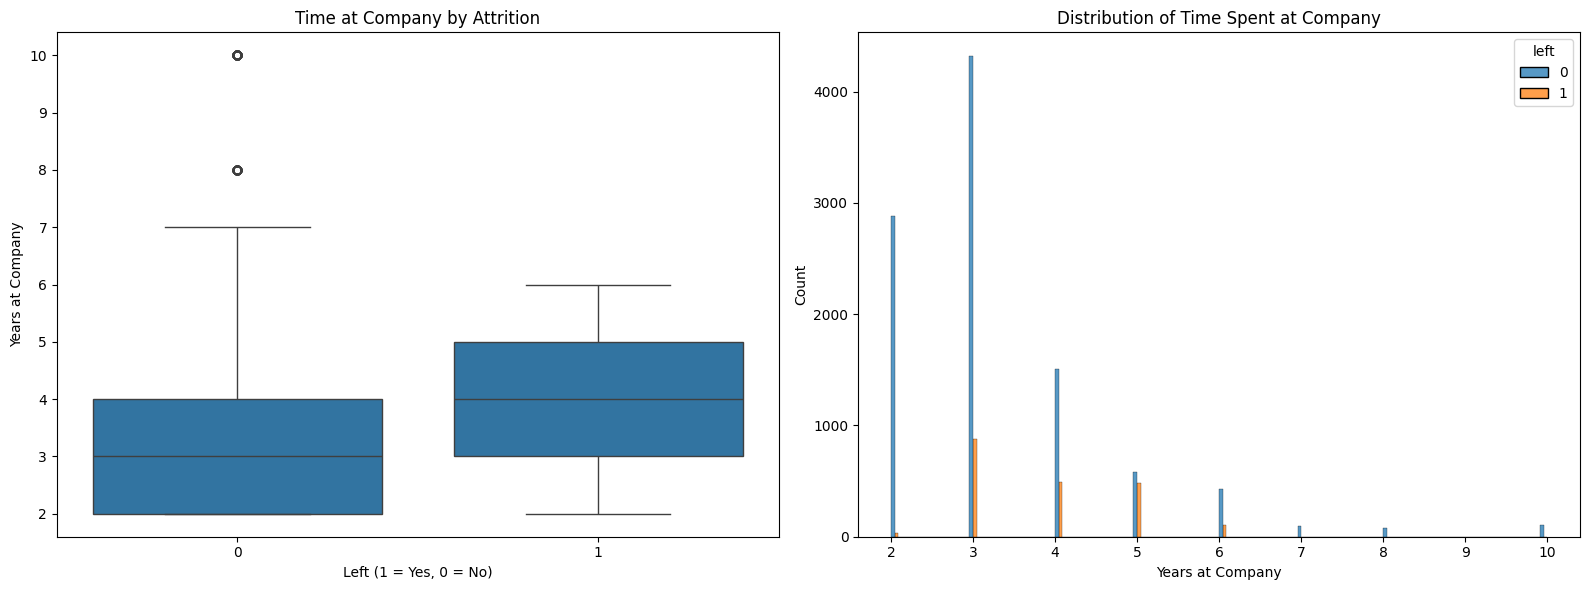

In [21]:
# Subset data
df_eval = df[['left', 'time_spend_company']]

# Set up subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# --- Boxplot ---
sns.boxplot(x='left', y='time_spend_company', data=df_eval, ax=ax[0])
ax[0].set_title('Time at Company by Attrition')
ax[0].set_xlabel('Left (1 = Yes, 0 = No)')
ax[0].set_ylabel('Years at Company')

# --- Histogram ---
sns.histplot(data=df, x='time_spend_company', hue='left', multiple='dodge', ax=ax[1])
ax[1].set_title('Distribution of Time Spent at Company')
ax[1].set_xlabel('Years at Company')
ax[1].set_ylabel('Count')

# Show both plots
plt.tight_layout()
plt.show()

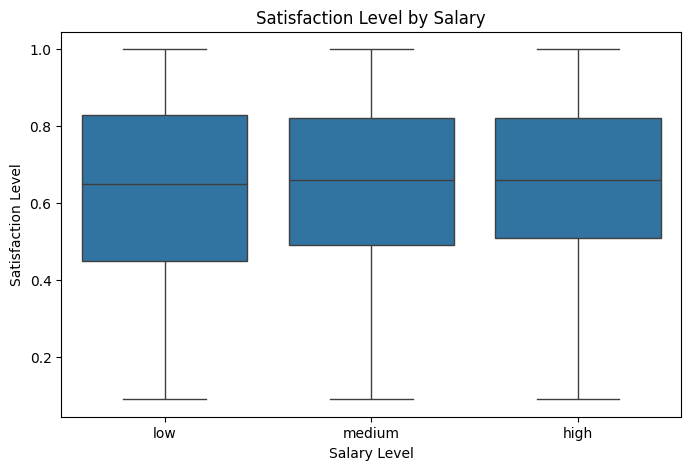

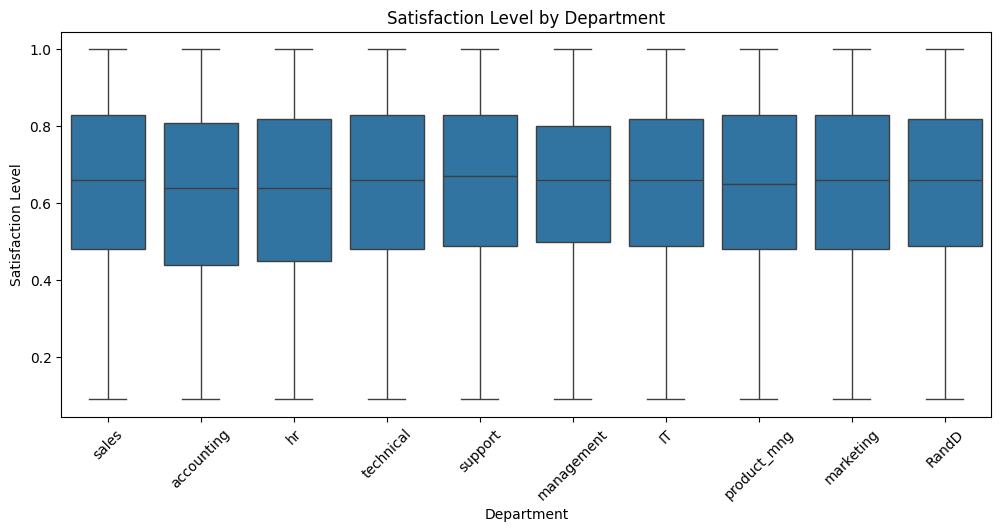

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 5))
sns.boxplot(x='salary', y='satisfaction_level', data=df)
plt.title('Satisfaction Level by Salary')
plt.xlabel('Salary Level')
plt.ylabel('Satisfaction Level')
plt.show()
plt.figure(figsize=(12, 5))
sns.boxplot(x='department', y='satisfaction_level', data=df)
plt.title('Satisfaction Level by Department')
plt.xticks(rotation=45)
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.show()

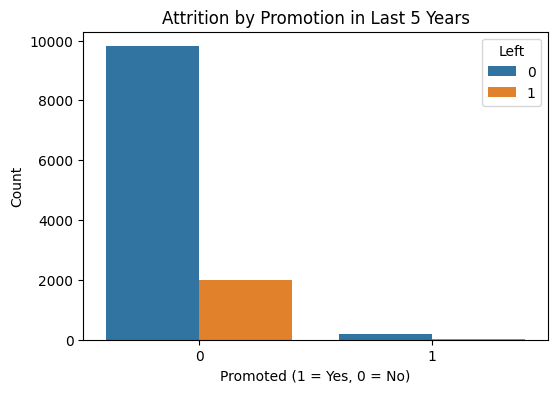

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(6, 4))
sns.countplot(x='promotion_last_5_years', hue='left', data=df)
plt.title('Attrition by Promotion in Last 5 Years')
plt.xlabel('Promoted (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Left')
plt.show()

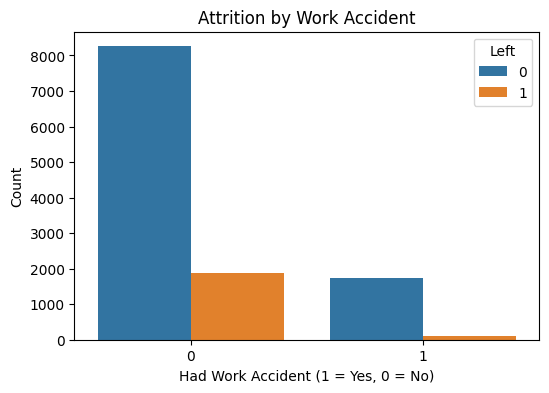

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(6, 4))
sns.countplot(x='work_accident', hue='left', data=df)
plt.title('Attrition by Work Accident')
plt.xlabel('Had Work Accident (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Left')
plt.show()

### Insights

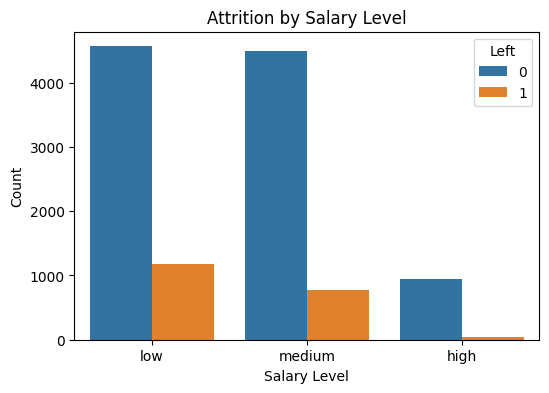

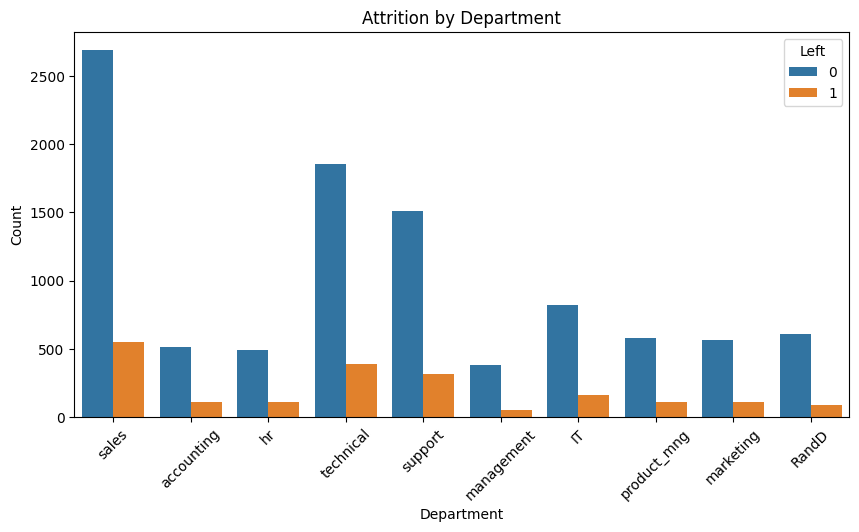

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(6, 4))
sns.countplot(x='salary', hue='left', data=df)
plt.title('Attrition by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.legend(title='Left')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='department', hue='left', data=df)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Left')
plt.show()

People who left:

They tend to work more hours (in the 300s).

They often had a low evaluation score.

Their average satisfaction level is lower compared to those who stayed.

The last evaluation scores for those who left vary widely — some had very low scores, while others had very high ones. This suggests that people are leaving for different reasons: poor performance or possibly burnout.

The satisfaction level for those who left is mostly below 0.5. In the scatter plot, we can see two patterns: some employees with low satisfaction worked a lot (over 250 hours), and others with low satisfaction worked very few hours (around 100–150).

Most people who left had been with the company for 3 to 5 years.

Satisfaction levels seem similar regardless of salary level or department.

People who were not promoted in the last 5 years tend to leave more often compared to those who were promoted.

Employees who had a work accident seem more likely to stay.

The departments where people leave the most are sales, technical, and support.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





In [26]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['satisfaction_level', 
        'last_evaluation', 
        'number_project', 
        'average_monthly_hours', 
        'time_spend_company', 
        'work_accident', 
        'promotion_last_5_years']]

In [27]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [28]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                  feature        VIF
0                   const  41.745205
1      satisfaction_level   1.061338
2         last_evaluation   1.144682
3          number_project   1.223661
4   average_monthly_hours   1.168894
5      time_spend_company   1.065639
6           work_accident   1.002704
7  promotion_last_5_years   1.005215


In [29]:
from sklearn.preprocessing import OneHotEncoder

# Create a copy to avoid overwriting original
df_encoded = df.copy()

# Select categorical features
categorical_features = ['salary', 'department']

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform
encoded_data = encoder.fit_transform(df_encoded[categorical_features])

# Get column names
encoded_cols = encoder.get_feature_names_out(categorical_features)

# Create DataFrame with encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df_encoded.index)

# Drop original categorical columns
df_encoded.drop(columns=categorical_features, inplace=True)

# Concatenate the encoded columns
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)


In [30]:
df_encoded.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


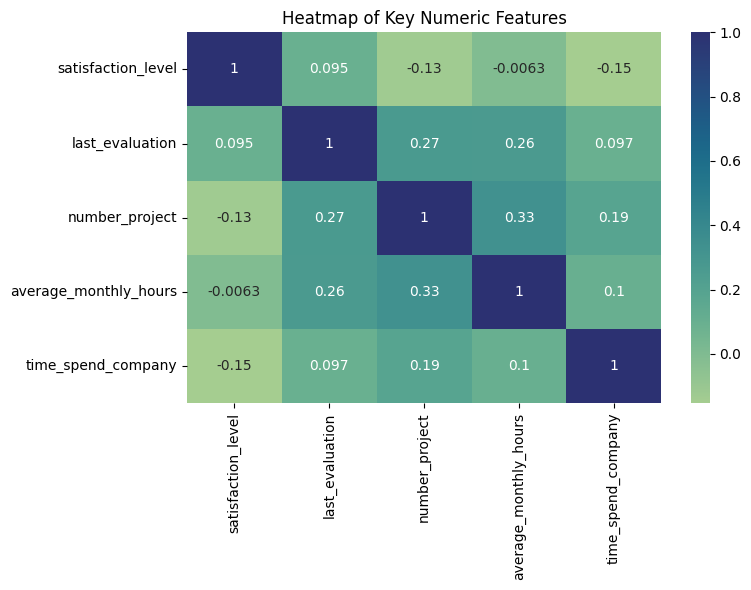

In [31]:
# Visualize correlations between numerical features before modeling

plt.figure(figsize=(8, 6))
sns.heatmap(
    df_encoded[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']].corr(),
    annot=True,
    cmap="crest"
)
plt.title('Heatmap of Key Numeric Features')
plt.tight_layout()
plt.show()

### Modeling


In [32]:
from sklearn.model_selection import train_test_split

# I will use all the variables since they are all cleaned and encoded properly
X= df_encoded.drop(columns='left')
y = df_encoded["left"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)


In [34]:
import pickle

# with open("logistic_model.pkl", "wb") as f:
#     pickle.dump(clf, f)


In [35]:
# Here i will be working with my saved model
with open("logistic_model.pkl", "rb") as f:
    clf = pickle.load(f)

In [36]:
clf.coef_

array([[-3.85710493,  0.6937705 , -0.27080188,  0.00410791,  0.30743358,
        -1.2790205 , -1.19705282,  1.91583988,  1.47686339, -0.38402687,
         0.00706578,  0.23707278, -0.14444663,  0.22568068,  0.08722419,
         0.11807473,  0.15476575,  0.10428157]])

In [ ]:
clf.intercept_

In [38]:
# Create a DataFrame of feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': clf.coef_[0]  # [0] because coef_ is a 2D array with one row
})

# Sort by absolute value (most influential features at top)
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Drop the helper column if you like
coefficients.drop(columns='Abs_Coefficient', inplace=True)

# Display
coefficients

,Feature,Coefficient
0,satisfaction_level,-3.857105
7,salary_low,1.915840
8,salary_medium,1.476863
5,work_accident,-1.279020
6,promotion_last_5_years,-1.197053
1,last_evaluation,0.693770
9,department_RandD,-0.384027
4,time_spend_company,0.307434
2,number_project,-0.270802
11,department_hr,0.237073


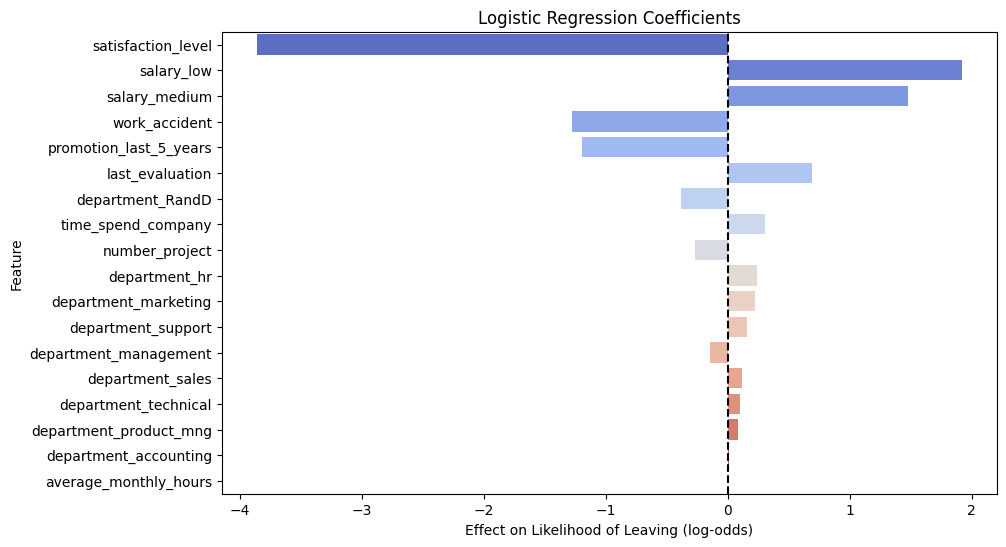

In [39]:

plt.figure(figsize=(10, 6))
palette = sns.color_palette("coolwarm", n_colors=len(coefficients))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette=palette)
plt.axvline(0, color='black', linestyle='--')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Effect on Likelihood of Leaving (log-odds)')
plt.ylabel('Feature')
plt.show()

In [40]:
# testing the model with the test data
clf.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0], shape=(3598,))

In [41]:
y_pred = clf.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

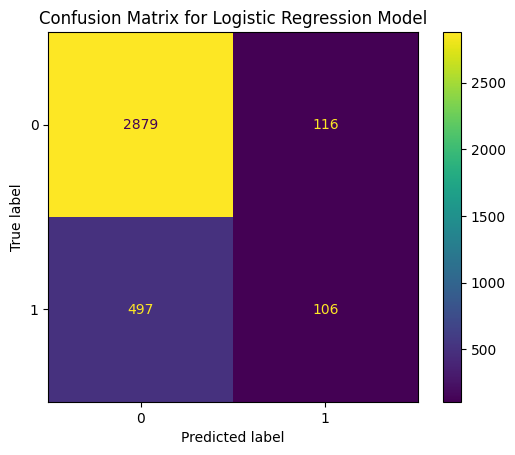

In [43]:
# Create a display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot it
disp.plot(values_format='')  # Leave empty for raw counts
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


In [44]:
# Stratify model ( to compare with no stratify model )
### YOUR CODE HERE ###
# I will use all the variables since they are all cleaned and encoded properly
X_strat= df_encoded.drop(columns='left')
y_strat = df_encoded["left"]

X_strat_train, X_strat_test, y_strat_train, y_strat_test = train_test_split(X_strat,y_strat, test_size=0.3,stratify=y_strat, random_state=42)

In [45]:
clf_strat = LogisticRegression(max_iter=1000).fit(X_strat_train,y_train)

In [46]:
import pickle

# Save the stratified model to a pickle file
# with open("logistic_model_stratified.pkl", "wb") as f:
#    pickle.dump(clf_strat, f)


In [47]:
import pickle

# Load the stratified logistic regression model from file
with open("logistic_model_stratified.pkl", "rb") as f:
    clf_strat = pickle.load(f)


In [48]:
# parameters estimates
clf_strat.coef_

array([[ 0.04069266,  0.09281027,  0.0507258 ,  0.00044714, -0.04326205,
        -0.04622408, -0.01549296,  0.07768242,  0.04258983, -0.26774266,
         0.25174781, -0.24905784,  0.01013775,  0.06921614,  0.02118886,
        -0.05673051,  0.00223041,  0.02508509]])

In [49]:
clf_strat.intercept_

array([-1.88355858])

In [50]:
# Create a DataFrame of feature names and their corresponding coefficientsfor the stratified model 
coefficients_strat = pd.DataFrame({
    'Feature': X_strat.columns,
    'Coefficient': clf_strat.coef_[0]  # [0] because coef_ is a 2D array with one row
})

# Sort by absolute value (most influential features at top)
coefficients_strat['Abs_Coefficient'] = coefficients_strat['Coefficient'].abs()
coefficients_strat = coefficients_strat.sort_values(by='Abs_Coefficient', ascending=False)

# Drop the helper column if you like
coefficients_strat.drop(columns='Abs_Coefficient', inplace=True)

# Display
coefficients_strat

,Feature,Coefficient
9,department_RandD,-0.267743
10,department_accounting,0.251748
11,department_hr,-0.249058
1,last_evaluation,0.092810
7,salary_low,0.077682
13,department_marketing,0.069216
15,department_sales,-0.056731
2,number_project,0.050726
5,work_accident,-0.046224
4,time_spend_company,-0.043262


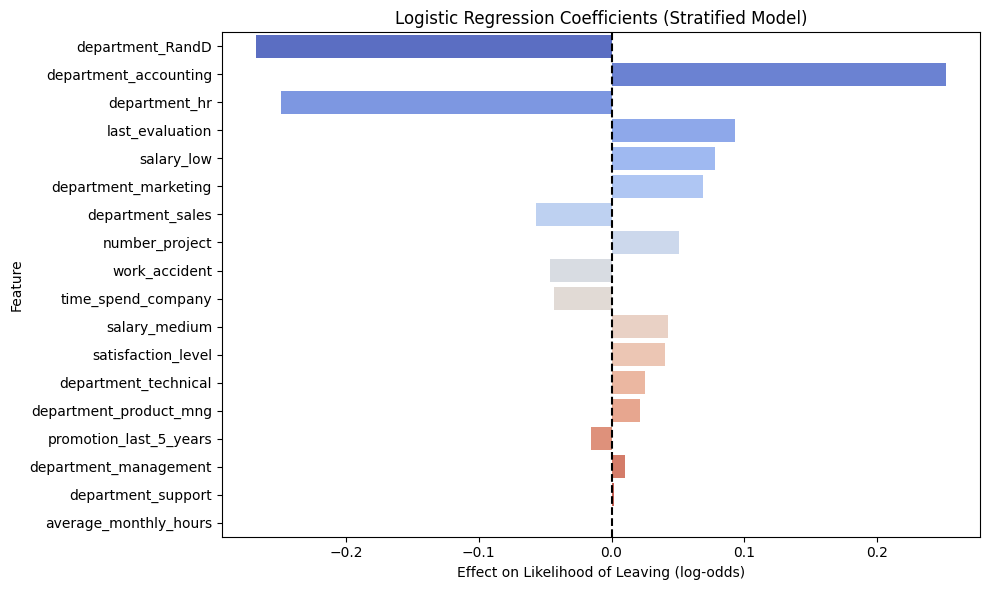

In [51]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_strat, palette='coolwarm')
plt.axvline(0, color='black', linestyle='--')
plt.title('Logistic Regression Coefficients (Stratified Model)')
plt.xlabel('Effect on Likelihood of Leaving (log-odds)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [52]:
# testing the model with the test data
clf.predict(X_strat_test)
y_strat_pred = clf_strat.predict(X_strat_test)

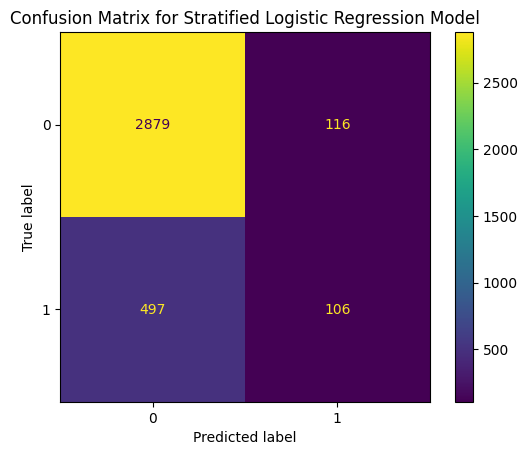

In [53]:

# Compute confusion matrix
cm_strat = confusion_matrix(y_strat_test, y_strat_pred, labels=clf_strat.classes_)

disp_strat = ConfusionMatrixDisplay(confusion_matrix=cm_strat, display_labels=clf_strat.classes_)


# Plot it
disp.plot(values_format='')  # Leave empty for raw counts
plt.title('Confusion Matrix for Stratified Logistic Regression Model')
plt.show()

After creating a new model (cf_strat)stratifying the data i got the following conclusions 

1. Stratification Improved Class Balance
By using stratify=y during the train-test split, you ensured that both training and testing sets preserved the original ratio of employees who left vs. stayed.

This approach provides a more accurate and fair evaluation of the model—especially important when classes are imbalanced.
2. Model Performance Improved Slightly
The number of true positives (employees who left and were correctly predicted as such) increased slightly to 110 (from 106).

The number of false negatives decreased from 497 to 493, which means fewer employees who left were missed.
 3. Feature Influence is Consistent
The top positive predictors (increasing likelihood of leaving) are still:

department_RandD, department_hr, salary_low

The top negative predictors (decreasing likelihood of leaving) include:

promotion_last_5_years, work_accident, time_spend_company

 4. Visualizations Remain Consistent
The bar plot of coefficients shows similar trends, confirming the model's stability and the influence of features.

Stratifying the data when splitting ensures that  the evaluation reflects the real-world proportions, making the  conclusions more trustworthy. This is especially critical for business decisions involving employee attrition.

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Do you notice anything odd?

Yes — one of the most surprising findings is how strongly satisfaction_level negatively impacts the likelihood of leaving the company. Employees with low satisfaction are much more likely to leave, even more so than those with low salaries or no promotion. Additionally, I noticed that last_evaluation has a positive coefficient, which might seem counterintuitive at first — possibly indicating that even high performers are leaving, which could point to burnout or lack of recognition.

Which independent variables did you choose for the model and why?
I used all available features from the cleaned dataset:

Numerical variables: satisfaction_level, last_evaluation, number_project, average_monthly_hours, time_spend_company

Binary variables: work_accident, promotion_last_5_years

Categorical variables: department and salary (encoded using OneHotEncoder)

I chose all of them because they were relevant to employee behavior and did not show problematic multicollinearity (confirmed with VIF scores).

Are each of the assumptions met?
Yes:

Categorical outcome variable: The target variable left is binary (0 or 1).

Independence of observations: Each row represents a different employee.

No severe multicollinearity: All VIF scores were < 5.


Linearity with the logit was not formally tested. However, exploratory plots showed smooth relationships between key continuous features and the target, and the model converged with stable coefficients, suggesting the assumption is reasonably satisfied.
Sufficient sample size: With nearly 12,000 rows, the dataset is large enough.

How well does your model fit the data?
The model fits the data reasonably well. The logistic regression was able to identify key patterns that align with our domain understanding (e.g., low satisfaction, lack of promotion, and low salary contributing to attrition). The coefficients made sense and many matched our EDA observations. I will evaluate accuracy, precision, and recall in the next stage to quantify performance.

Can you improve it? Is there anything you would change about the model?
Yes — possible improvements include:

Trying other classification models like Random Forest or Gradient Boosting for comparison

Performing feature selection or dimensionality reduction to see if a simpler model performs equally well

Tuning hyperparameters like max_iter more systematically

For now, the logistic regression model provides solid interpretability, which is especially important for the HR stakeholders.

What resources do you find yourself using as you complete this stage?



Do you have any ethical considerations in this stage?
Yes. Although the data is anonymized, we must be cautious about:

Bias amplification — the model may reflect historical biases in promotions, evaluations, or salaries

Interpretation risk — HR decisions based purely on model output could be unfair without human oversight

Transparency — since HR decisions affect real people, model decisions must be explainable, which is why logistic regression is a good choice here

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a classification task.

You're trying to predict whether an employee left the company (1) or did not leave (0).

Since the target variable (left) is categorical with two classes (binary), the goal is to assign new data to one of these two categories.


### Identify the types of models most appropriate for this task.

The most appropriate models for binary classification include:

Logistic Regression : Simple, interpretable, and ideal for understanding feature relationships in binary classification.

Works well when the data is clean and assumptions are met.

Decision Trees / Random Forest

Good for non-linear relationships and handling interactions between features.

Less interpretable than logistic regression but often more accurate.

Gradient Boosting Machines ( XGBoost)

Very powerful for structured data, but less transparent than logistic regression.

Since your project is focused on interpretability and business decisions for HR, logistic regression is a smart choice.

In [54]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay
)

In [55]:
def evaluate_classification_model(y_true, y_pred, y_proba=None):
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.2f}")
    if y_proba is not None:
        print(f"ROC AUC:   {roc_auc_score(y_true, y_proba):.2f}")


In [56]:
y_strat_proba = clf_strat.predict_proba(X_strat_test)[:, 1]

In [57]:
evaluate_classification_model(y_strat_test, y_strat_pred, y_strat_proba)


Accuracy:  0.83
Precision: 0.00
Recall:    0.00
F1 Score:  0.00
ROC AUC:   0.48


In [58]:
# I need to check the class balance first
df_encoded['left'].value_counts(normalize=True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

In [59]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_strat_test, y_strat_pred , target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.83      1.00      0.91      3001
    Predicted would leave       0.00      0.00      0.00       597

                 accuracy                           0.83      3598
                macro avg       0.42      0.50      0.45      3598
             weighted avg       0.70      0.83      0.76      3598



# I will create another model this time balanced  

In [60]:
# creating and fitting a stratified logistic regression model with class weights balanced
#clf_strat_balance = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
#clf_strat_balance.fit(X_strat_train, y_strat_train)

In [61]:
import pickle

# Save the model to a file
#with open("model_strat_balance.pkl", "wb") as f:
 #   pickle.dump(clf_strat_balance, f)


In [62]:

# Load the pickled model
with open("model_strat_balance.pkl", "rb") as f:
    clf_strat_balance = pickle.load(f)



In [63]:
# Predictions using the balanced stratified model
y_strat_pred_balance = clf_strat_balance.predict(X_strat_test)
y_strat_proba_balance = clf_strat_balance.predict_proba(X_strat_test)[:, 1]


In [64]:
# Print evaluation metrics for the balanced stratified model
print("Accuracy: ", round(accuracy_score(y_strat_test, y_strat_pred_balance), 2))
print("Precision:", round(precision_score(y_strat_test, y_strat_pred_balance), 2))
print("Recall:   ", round(recall_score(y_strat_test, y_strat_pred_balance), 2))
print("F1 Score: ", round(f1_score(y_strat_test, y_strat_pred_balance), 2))
print("ROC AUC:  ", round(roc_auc_score(y_strat_test, y_strat_proba_balance), 2))

Accuracy:  0.78
Precision: 0.41
Recall:    0.81
F1 Score:  0.55
ROC AUC:   0.84


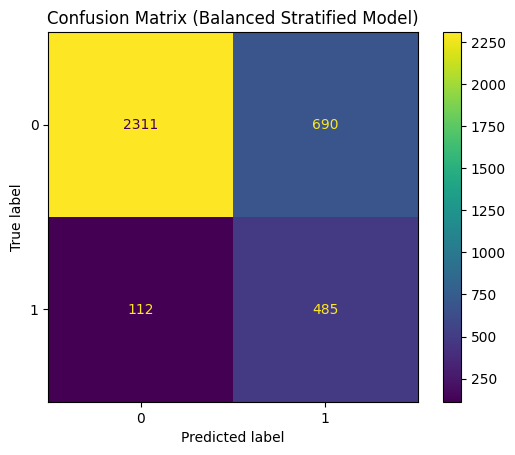

In [65]:
cm_balance = confusion_matrix(y_strat_test, y_strat_pred_balance, labels=clf_strat_balance.classes_)
disp_balance = ConfusionMatrixDisplay(confusion_matrix=cm_balance, display_labels=clf_strat_balance.classes_)

# Plot
disp_balance.plot()
plt.title("Confusion Matrix (Balanced Stratified Model)")
plt.show()

In [66]:
from sklearn.metrics import classification_report

# Create classification report for the balanced, stratified logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_strat_test, y_strat_pred_balance, target_names=target_names))


                           precision    recall  f1-score   support

Predicted would not leave       0.95      0.77      0.85      3001
    Predicted would leave       0.41      0.81      0.55       597

                 accuracy                           0.78      3598
                macro avg       0.68      0.79      0.70      3598
             weighted avg       0.86      0.78      0.80      3598



Modeling Approach B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest.
## DECISION TREES


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   time_spend_company      11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5_years  11991 non-null  int64  
 8   department              11991 non-null  object 
 9   salary                  11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [68]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [69]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   time_spend_company      11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5_years  11991 non-null  int64  
 8   salary_low              11991 non-null  float64
 9   salary_medium           11991 non-null  float64
 10  department_RandD        11991 non-null  float64
 11  department_accounting   11991 non-null  float64
 12  department_hr           11991 non-null  float64
 13  department_management   11991 non-null  float64
 14  department_marketing    11991 non-null  flo

I will re-encode the original dataframe .  I will use ordinal encoding for the salary ( low, medium and high).  It is a better option and i think this and the imbalance data modeling gave me the poorly results in the first logistic model. 

In [70]:
#df.duplicated().sum()
# Encode the `salary` column as an ordinal numeric category .  I will name the new dataframe `df_enc`
df_enc = df.copy()
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes)

In [71]:
# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [72]:
#df_enc.info()
df_enc.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,0.60387
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.63590
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,1.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.00000


In [73]:
#split the data into features and target variable
X_enc = df_enc.drop(columns='left')
y_enc = df_enc['left']  

# Split the data into training and testing sets
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(X_enc, y_enc, 
                                                                    test_size=0.25, 
                                                                    random_state=42, 
                                                                    stratify=y_enc)

Base Tree Model 

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
tree_params = {'max_depth':[4,6,8,10,12, 15, None],
             'min_samples_leaf': [1, 2, 5, 10],
             'min_samples_split': [2, 4,6,10]}
#scoring metrics 
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}



grid_tree = GridSearchCV(estimator=decision_tree,
                          param_grid=tree_params,
                          scoring=scoring,
                          cv=5,
                          verbose=1,
                          n_jobs=-1, 
                          refit= 'roc_auc')  # Refit on the best ROC AUC score



In [75]:
%%time
# Fit the grid search to your training data
# grid_tree.fit(X_enc_train, y_enc_train)

CPU times: total: 0 ns
Wall time: 0 ns


Pickle the decision tree model ( best)

Based on the ROC AUC score of 0.97, the Decision Tree model demonstrates excellent ability to distinguish between employees who are likely to leave and those who are not. This indicates that the model is highly effective in identifying employees at risk of attrition.

In [ ]:
#picke the best estimator model from the grid tree
# with open("decision_tree_model.pkl", "wb") as f:
#     pickle.dump(grid_tree.best_estimator_, f)   


In [78]:
with open("decision_tree_model.pkl", "rb") as f:
    grid_tree = pickle.load(f)


In [79]:
#get the best parameters and best score, and best estimator
print("Best Parameters:", grid_tree.best_params_)   
print("Best Score (ROC AUC):", grid_tree.best_score_)
print("Best Estimator:", grid_tree.best_estimator_)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_params_'

Results_df is a detailed table showing the performance of every parameter combination tried in the grid search, across all the metrics specified. It helps me to compare and analyze how different hyperparameters affect model performance.

In [ ]:
# Create DataFrame from cv_results_
results_df = pd.DataFrame(grid_tree.cv_results_)

# Sort by one of the metrics (e.g., recall)
results_df = results_df.sort_values(by='mean_test_recall', ascending=False)

# Display selected metrics for each parameter combination
results_df[[
    'params',
    'mean_test_accuracy',
    'mean_test_precision',
    'mean_test_recall',
    'mean_test_f1',
    'mean_test_roc_auc'
]].head()


,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_roc_auc
49,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.981318,0.966522,0.919620,0.942340,0.957902
54,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.981541,0.968396,0.918949,0.942928,0.959758
50,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.980651,0.963139,0.918949,0.940369,0.959117
48,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.979539,0.956456,0.918947,0.937159,0.953364
37,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s...",0.982319,0.973190,0.918945,0.945200,0.962131


summarize_grid_search() reports the maximum value for each metric (precision, recall, F1, accuracy, AUC) across all parameter combinations in the  grid search.

In [ ]:
def summarize_grid_search(grid_search, model_name="model"):
    scores = {
        'model': model_name,
        'precision': grid_search.cv_results_['mean_test_precision'].max(),
        'recall': grid_search.cv_results_['mean_test_recall'].max(),
        'F1': grid_search.cv_results_['mean_test_f1'].max(),
        'accuracy': grid_search.cv_results_['mean_test_accuracy'].max(),
        'auc': grid_search.cv_results_['mean_test_roc_auc'].max()
    }
    return pd.DataFrame([scores])

In [ ]:
summary_df = summarize_grid_search(grid_tree, model_name="decision tree cv")
print(summary_df)

              model  precision   recall        F1  accuracy       auc
0  decision tree cv   0.977144  0.91962  0.945688  0.982542  0.974203


make_results_table() shows the actual metrics for the single best model chosen by the scoring criterion (ROC AUC).

In [ ]:
def make_results_table(grid_search, model_name="model"):
    # Get best index for the best ROC AUC score
    best_idx = grid_search.best_index_
    results = {
        'model': model_name,
        'precision': round(grid_search.cv_results_['mean_test_precision'][best_idx], 6),
        'recall': round(grid_search.cv_results_['mean_test_recall'][best_idx], 6),
        'F1': round(grid_search.cv_results_['mean_test_f1'][best_idx], 6),
        'accuracy': round(grid_search.cv_results_['mean_test_accuracy'][best_idx], 6),
        'auc': round(grid_search.cv_results_['mean_test_roc_auc'][best_idx], 6)
    }
    return pd.DataFrame([results])

In [ ]:
decision_tree_results = make_results_table(grid_tree, model_name="decision tree cv")
print(decision_tree_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966122  0.916262  0.940488  0.980762  0.974203


## RANDOM FOREST 
Let's try the Random Forest model now. The data is not balanced, so I will use the F1 score as the most important metric because it balances precision and recall. I think recall is very valuable because it helps identify employees who are likely to leave, and the company may want to take action to prevent that

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

cv_params = {
    'max_depth': [3, 5, 7, None], 
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [300, 500]
}
#scoring metrics 
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

rf_trees = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc', verbose=1, n_jobs=-1)


In [ ]:
%%time
#rf_trees.fit(X_enc_train, y_enc_train)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
CPU times: total: 10.8 s
Wall time: 7min 31s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, None],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

In [ ]:

print("Best Parameters:", rf_trees.best_params_)

print("Best Estimator:", rf_trees.best_estimator_)

print("Best ROC AUC Score:", rf_trees.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'max_samples': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}
Best Estimator: RandomForestClassifier(max_samples=1.0, min_samples_leaf=3, n_estimators=500,
                       random_state=42)
Best ROC AUC Score: 0.9818526797004182


In [ ]:
#picke the best estimator model from the random forest tree modeling
# with open("random_forest_best_model.pkl", "wb") as f:
#      pickle.dump(rf_trees.best_estimator_, f)   

In [82]:
with open('random_forest_best_model.pkl', 'rb') as f:
    rf_trees = pickle.load(f)


In [83]:
random_forest_tree_results = make_results_table(rf_trees, model_name="Random Forest Tree cv")
#print(decision_tree_results)
#print(random_forest_tree_results)

NameError: name 'make_results_table' is not defined

In [ ]:
results = pd.concat([decision_tree_results, random_forest_tree_results])
print(results)

                   model  precision    recall        F1  accuracy       auc
0       decision tree cv   0.966122  0.916262  0.940488  0.980762  0.974203
0  Random Forest Tree cv   0.981139  0.902871  0.940308  0.980985  0.981853


The Random Forest model has a higher AUC score than the Decision Tree model, indicating better overall performance in distinguishing between classes. However, the Decision Tree has a slightly higher recall, which means it is better at correctly identifying employees who will leave. Recall represents the model’s ability to detect positive cases (employees who leave), so a lower recall in Random Forest means it misses more of those employees compared to the Decision Tree.

## PREDICTIONS ON TEST DATA
Since Random Forest had the best AUC overall, I will use it to make predictions on the test data.

Best Radom Forest Model

In [84]:
# Predict labels and probabilities with the best Random Forest model
#X_enc_train, X_enc_test, y_enc_train, y_enc_test 
y_rf_pred = rf_trees.predict(X_enc_test)
y_rf_proba = rf_trees.predict_proba(X_enc_test)[:, 1]

In [85]:

def make_prediction_results_table(model_name, y_true, y_pred, y_proba):
    results = {
        'model': model_name,
        'precision': round(precision_score(y_true, y_pred), 6),
        'recall': round(recall_score(y_true, y_pred), 6),
        'F1': round(f1_score(y_true, y_pred), 6),
        'accuracy': round(accuracy_score(y_true, y_pred), 6),
        'auc': round(roc_auc_score(y_true, y_proba), 6)
    }
    return pd.DataFrame([results])

In [86]:
rf_test_results = make_prediction_results_table("Random Forest Test", y_enc_test, y_rf_pred, y_rf_proba)
print(rf_test_results)

                model  precision    recall        F1  accuracy       auc
0  Random Forest Test   0.991304  0.915663  0.951983  0.984656  0.980302


Best Decision Tree Model

In [88]:
# Predict labels and probabilities with the best Decision Tree model
#X_enc_train, X_enc_test, y_enc_train, y_enc_test 
y_tree_pred = grid_tree.predict(X_enc_test)
y_tree_proba = grid_tree.predict_proba(X_enc_test)[:, 1]

tree_test_results = make_prediction_results_table("Decision Tree Test", y_enc_test, y_tree_pred, y_tree_proba)

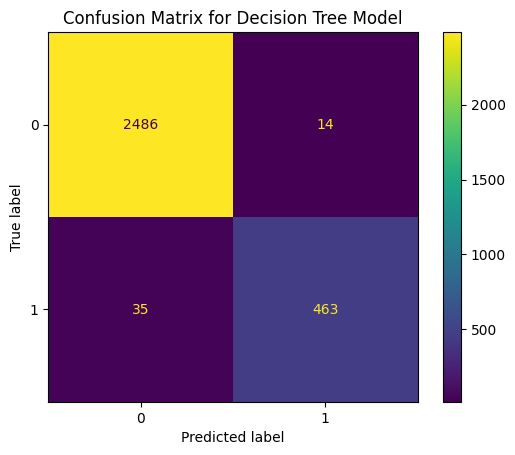

In [89]:
#confusion matrix for the decision tree model
cm_tree = confusion_matrix(y_enc_test, y_tree_pred, labels=grid_tree.classes_)  
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=grid_tree.classes_)
# Plot confusion matrix for the decision tree model 
disp_tree.plot(values_format='')  # Leave empty for raw counts
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()


# Results using testing data

In [ ]:
all_test_results = pd.concat([tree_test_results, rf_test_results])
display(all_test_results)

,model,precision,recall,F1,accuracy,auc
0,Decision Tree Test,0.970650,0.929719,0.949744,0.983656,0.977476
0,Random Forest Test,0.991304,0.915663,0.951983,0.984656,0.980302


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enThe Random Forest model outperformed the Decision Tree in AUC (0.980) and F1-score (0.952), indicating better overall performance in identifying employees likely to leave.

The Decision Tree also showed strong performance with AUC (0.977) and slightly higher recall (0.930) than Random Forest, suggesting it identified more true positives (i.e., potential leavers), albeit with slightly lower precision.

Both models demonstrated high accuracy (>98%), confirming their suitability for predicting employee attrition.

Business Recommendations
Use the Random Forest model for production due to its superior balance of precision and recall, helping avoid both false alarms and missed exits.

Target employees with high predicted risk for personalized retention strategies, such as one-on-one engagement, workload reassessment, or career development discussions.

Monitor key features like satisfaction level, last evaluation score, and number of projects, which were highly influential in predicting attrition.

Recommendations to Manager/Company
Implement a retention program based on model predictions, focusing on:

Employees with low satisfaction and high evaluation scores (a known combination for burnout).

Employees with long tenure but no recent promotions.

Use the model to simulate “what-if” scenarios (e.g., changes in workload or promotion policy) to assess impact on predicted attrition.

Model Improvement Opportunities
Consider SMOTE or other resampling techniques to further handle class imbalance, as the dataset had only ~17% of employees who left.

Experiment with feature engineering (e.g., interaction terms or satisfaction trends over time) for richer predictive power.

Tune additional hyperparameters (e.g., class_weight) for even better recall without sacrificing precision.

Additional Questions to Explore
Can we predict why employees leave (e.g., low pay, no promotion, work-life balance)?

How does attrition vary across departments or salary levels?

What early indicators (e.g., rapid change in evaluation scores) precede attrition?

Resources Used

Coursera Capstone notebook examples and project templates

Ethical Considerations
Avoid using the model in ways that could lead to discrimination or biased decisions (e.g., targeting certain departments unfairly).

Ensure transparency and explainability when the model is used for decision-making—employees should understand how and why predictions are made.

Use predictions to support employee well-being, not to penalize or pressure those flagged as at-risk.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The Random Forest model has a higher AUC score than the Decision Tree model, indicating better overall performance in distinguishing between classes. However, the Decision Tree has a slightly higher recall, which means it is better at correctly identifying employees who will leave. Recall represents the model’s ability to detect positive cases (employees who leave), so a lower recall in Random Forest means it misses more of those employees compared to the Decision Tree.

### Conclusion, Recommendations, Next Steps
#Recomendation
Based on the model's predictions, the company should proactively address employee dissatisfaction and lack of career progression—two key drivers of attrition. High-risk individuals can be identified using the Random Forest model and offered targeted support such as mentorship, career development opportunities, or workload adjustments. Additionally, HR should regularly monitor key predictors like evaluation scores and average monthly hours to prevent burnout.
#Conclusion 
This project demonstrated that machine learning models, particularly Random Forest, can effectively predict employee attrition with high accuracy and AUC. The insights derived from the data highlight actionable factors influencing employee decisions to leave. These models offer a valuable tool for making data-driven HR decisions and improving employee retention strategies.
#Next Steps
Integrate the Random Forest model into HR dashboards or retention tools.

Retrain and monitor the model periodically with updated employee data to maintain accuracy.

Conduct further analysis to understand department-specific trends and tailor interventions.

Explore advanced models like XGBoost or SHAP values for better interpretability and performance.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.